In [1]:
from finlab.data import Data
data = Data()
close = data.get("收盤價").fillna(1)

In [20]:
import tqdm
columns = close.columns
dic = {}
for i in tqdm.tqdm_notebook(columns):
    c = close[i]
    di = {
        i:c
    }
    dic.update(di)
    
columns = columns[:500]

In [18]:
columns = columns[:500]

In [21]:
columns

Index(['0015', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057',
       '0058',
       ...
       '2495', '2496', '2497', '2498', '2499', '2501', '2504', '2505', '2506',
       '2509'],
      dtype='object', name='stock_id', length=500)

In [17]:
import numpy as np
import tqdm
cnn_x = []
cnn_y = []
indexes = []

time_period = 30

for j in tqdm.tqdm_notebook(columns):
    k = dic[j]
    for i in tqdm.tqdm_notebook(range(0,len(close)-2*time_period-1,5)):
        xi = k.iloc[i:i+time_period]
        #xi = (xi-xi.min())/(xi.max()-xi.min())
        cnn_x.append((xi-xi.min())/(xi.max()-xi.min()))
    
        #yi = j.iloc[i+time_period+time_period -1]/close.iloc[i+time_period-1]
        cnn_y.append(k.iloc[i+time_period+time_period -1]/k.iloc[i+time_period-1])
        indexes.append(k.index[i+time_period-1])
    
cnn_x = np.array(cnn_x)
cnn_y = np.array(cnn_y)
indexes = np.array(indexes)

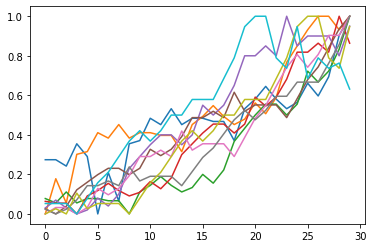

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    plt.plot(cnn_x[i])

In [6]:
#from finlab import ml
#print(dataset.shape)
##應該要是dataset
#dataset_drop_extreme_case = ml.drop_extreme_case(dataset, 
#    ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6'], thresh=0.01)
#
#print(dataset.shape)

NameError: name 'dataset' is not defined

## CNN

## 看情況reshape

In [7]:
cnn_x1 = cnn_x.reshape(cnn_x.shape[0],cnn_x.shape[1],1)
cnn_y1 = cnn_y.reshape(len(cnn_y), 1)

In [47]:
cnn_x1.ndim

3

In [166]:
cnn_y1.shape

(9054, 1)

In [8]:
import datetime
cnn_x_train = cnn_x1[indexes < datetime.datetime(2018,1,1)]
cnn_y_train = cnn_y1[indexes < datetime.datetime(2018,1,1)]

In [141]:
#import datetime
#cnn_x_train = cnn_x[indexes < datetime.datetime(2018,1,1)]
#cnn_y_train = cnn_y[indexes < datetime.datetime(2018,1,1)]

In [192]:
cnn_x_train

array([[[0.27419355],
        [0.27419355],
        [0.24193548],
        ...,
        [0.69354839],
        [0.90322581],
        [1.        ]],

       [[0.30136986],
        [0.24657534],
        [0.        ],
        ...,
        [0.93150685],
        [1.        ],
        [1.        ]],

       [[0.10714286],
        [0.        ],
        [0.21428571],
        ...,
        [0.76190476],
        [0.82142857],
        [1.        ]],

       ...,

       [[0.99934754],
        [0.        ],
        [0.99412788],
        ...,
        [0.96694215],
        [0.96563723],
        [0.        ]],

       [[0.99173554],
        [0.        ],
        [0.99130057],
        ...,
        [0.        ],
        [0.96976946],
        [0.96476729]],

       [[0.        ],
        [0.99499783],
        [0.99369291],
        ...,
        [0.96498478],
        [0.9784689 ],
        [0.98412353]]])

In [144]:
cnn_y.shape

(9054,)

In [65]:
cnn_x1[0].shape

(22, 1)

In [9]:
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.initializers import he_normal

#input_shape = cnn_x[0].shape
#time_period = 200
#num_classes = 1


model_m = Sequential()

model = keras.Sequential()

model.add(layers.Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=cnn_x1[0].shape))
model.add(layers.AveragePooling1D(3))

model.add(layers.Conv1D(filters=20, kernel_size=3, activation='relu'))
model.add(layers.AveragePooling1D(3))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=60, activation='relu'))
model.add(layers.Dense(units=48, activation='relu'))
model.add(layers.Dense(units=24, activation='relu'))
model.add(layers.Dense(units=1,))#activation = softmax))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0.01, amsgrad=False)

model.compile(loss='mse',
                optimizer=adam, metrics=['accuracy'])

print(model.summary())

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 28, 20)            80        
_________________________________________________________________
average_pooling1d_1 (Average (None, 9, 20)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 7, 20)             1220      
_________________________________________________________________
average_pooling1d_2 (Average (None, 2, 20)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4920      
_________________________________________________________________
dens

In [13]:
history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=5000,
                    epochs=50,
         
                    verbose=1,
                    validation_split=0.1,
                   )

Train on 39375 samples, validate on 4375 samples
Epoch 1/50
39375/39375 [==============================] - 1s 22us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/50
39375/39375 [==============================] - 1s 21us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/50
30000/39375 [=====================>........] - ETA: 0s - loss: nan - acc: 0.0000e+00

KeyboardInterrupt: 

In [23]:
cnn_x_train

array([[[0.27419355],
        [0.27419355],
        [0.24193548],
        ...,
        [0.69354839],
        [0.90322581],
        [1.        ]],

       [[0.30136986],
        [0.24657534],
        [0.        ],
        ...,
        [0.93150685],
        [1.        ],
        [1.        ]],

       [[0.10714286],
        [0.        ],
        [0.21428571],
        ...,
        [0.76190476],
        [0.82142857],
        [1.        ]],

       ...,

       [[0.89203085],
        [0.87660668],
        [0.90488432],
        ...,
        [0.07197943],
        [0.07455013],
        [0.14910026]],

       [[0.74293059],
        [0.75064267],
        [0.9562982 ],
        ...,
        [0.12339332],
        [0.06426735],
        [0.06683805]],

       [[0.88190955],
        [0.8718593 ],
        [1.        ],
        ...,
        [0.        ],
        [0.10552764],
        [0.20351759]]])

In [24]:
cnn_y_train

array([[1.16116116],
       [1.16831683],
       [1.2097561 ],
       ...,
       [1.06535948],
       [1.01978778],
       [0.9906595 ]])

In [65]:
cnn_x_train

array([[[0.425     ],
        [0.425     ],
        [0.375     ],
        ...,
        [0.825     ],
        [0.9       ],
        [1.        ]],

       [[0.425     ],
        [0.375     ],
        [0.55      ],
        ...,
        [0.9       ],
        [1.        ],
        [0.9       ]],

       [[0.375     ],
        [0.55      ],
        [0.45      ],
        ...,
        [1.        ],
        [0.9       ],
        [0.825     ]],

       ...,

       [[0.62616822],
        [0.95327103],
        [       nan],
        ...,
        [       nan],
        [       nan],
        [0.45327103]],

       [[0.95327103],
        [       nan],
        [1.        ],
        ...,
        [       nan],
        [0.45327103],
        [       nan]],

       [[       nan],
        [1.        ],
        [0.81775701],
        ...,
        [0.45327103],
        [       nan],
        [0.39252336]]])

In [57]:
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.initializers import he_normal

input_shape = cnn_x[0].shape
time_period = 200
num_classes = 1


model_m = Sequential()

model = keras.Sequential()

model.add(layers.Conv1D(filters=10, kernel_size=20, activation='relu', input_shape=cnn_x1[0].shape))
model.add(layers.AveragePooling1D(3))

#model.add(layers.Conv1D(filters=20, kernel_size=20, activation='relu'))
#model.add(layers.AveragePooling1D(1))
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=1, ))#activation = 'softmax'))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.99, epsilon=None, decay=0.01, amsgrad=False)

model.compile(loss='mse',
                optimizer=adam, metrics=['accuracy'])

print(model.summary())

history = model.fit(cnn_x_train, cnn_y_train,
                    batch_size=200,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1, )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 3, 10)             210       
_________________________________________________________________
average_pooling1d_10 (Averag (None, 1, 10)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               1320      
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 85        
Total params: 11,779
Trainable params: 11,779
Non-trainable params: 0
_________________________________________________________________
None
T

In [17]:
q = dic['0015'].index
q[0]

Timestamp('2007-04-23 00:00:00')

In [19]:
dic

{}

In [27]:
世界真理大全['為什麼魏擇壹會讓陳恩子生氣']

'因為陳恩子無病呻吟'